     ml     mAU  ml.1   mS/cm  ml.2     %  ml.3     %B  ml.4   MPa  ml.5  \
0  0.00   11.21  0.00   19.94  0.00  19.9  0.00    0.0  0.00  0.04  0.00   
1  0.13   12.92  0.13   19.97  0.13  20.0  0.13  100.0  0.13  0.14  0.13   
2  0.26   21.55  0.26   19.93  0.26  19.9  0.26  100.0  0.26  0.18  0.26   
3  0.39  626.93  0.39   19.21  0.39  19.1  0.39  100.0  0.39  0.19  0.39   
4  0.52  637.71  0.52   19.56  0.52  19.6  0.52  100.0  0.52  0.21  0.52   

    ml/min  ml.6   °C   ml.7 (Fractions)  ml.8  (Injections)  ml.9  \
0      0.5  0.00  8.9  36.98           1   0.0           3.0 -0.01   
1      0.5  0.13  8.9  37.98           2   NaN           NaN -0.01   
2      0.5  0.26  8.9  38.98           3   NaN           NaN -0.01   
3      0.5  0.39  8.9  39.98           4   NaN           NaN -0.01   
4      0.5  0.52  8.9  40.98           5   NaN           NaN -0.01   

                                         (Set Marks)  
0  Manual Run 17.01.2025, 14:13:32 W. Europe Stan...  
1           

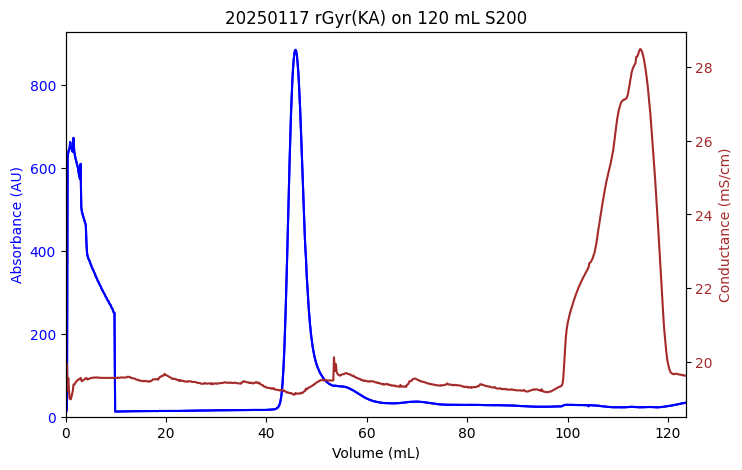

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

#loading data, and checking it here
df = pd.read_csv('20250120 rGyr KA raw.csv', skiprows=2)
print(df.head())

fig, ax1 = plt.subplots(figsize=(8,5))

#1st axis: absorbance
ax1.plot(df['ml'], df[' mAU'], label='Absorbance (mAU)', color='blue')
ax1.set_xlabel('Volume (mL)')
ax1.set_ylabel('Absorbance (AU)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

ax1.set_title('20250117 rGyr(KA) on 120 mL S200')

#2nd axis: conductance
ax2 = ax1.twinx()
ax2.plot(df['ml'], df[' mS/cm'], color='brown', label='Conductance (mS/cm)')
ax2.set_ylabel('Conductance (mS/cm)', color='brown')
ax2.tick_params(axis='y', labelcolor='brown')

#shade area under the curve:
x = df['ml']
y = df[' mAU']
ax1.plot(x, y, label='Absorbance (mAU)', color='blue')

#make sure theres no edge gap
ax1.set_xlim(left=0)
ax1.set_xlim(df['ml'].min(), df['ml'].max())
ax1.set_ylim(bottom=0)

plt.show()

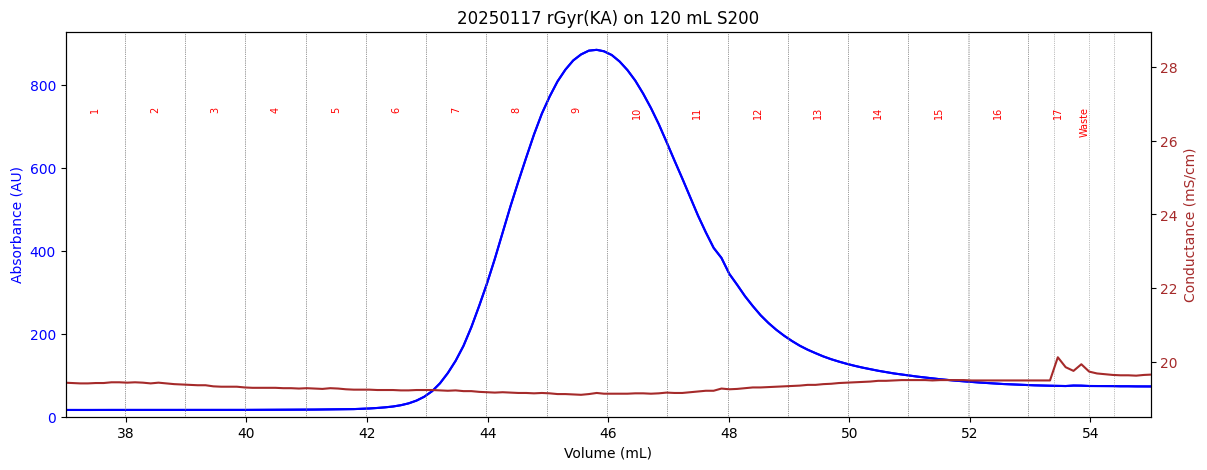

In [17]:
fig, ax1 = plt.subplots(figsize=(14,5))

#1st axis: absorbance
ax1.plot(df['ml'], df[' mAU'], label='Absorbance (mAU)', color='blue')
ax1.set_xlabel('Volume (mL)')
ax1.set_ylabel('Absorbance (AU)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

ax1.set_title('20250117 rGyr(KA) on 120 mL S200')


#2nd axis: conductance
ax2 = ax1.twinx()
ax2.plot(df['ml'], df[' mS/cm'], color='brown', label='Conductance (mS/cm)')
ax2.set_ylabel('Conductance (mS/cm)', color='brown')
ax2.tick_params(axis='y', labelcolor='brown')

#shade area under the curve:
x = df['ml']
y = df[' mAU']
ax1.plot(x, y, label='Absorbance (mAU)', color='blue')


#adding fraction labels
for i, row in df.iterrows():
    if pd.notna(row['ml.7']) and row['(Fractions)'] != '':
        start = row['ml.7']
        end = start + 1  # assuming fraction width is 1 mL

        # Draw vertical boundary lines (left and right edges of fraction)
        ax1.axvline(start, color='gray', linestyle=':', linewidth=0.5)
        ax1.axvline(end, color='gray', linestyle=':', linewidth=0.5)
        # Place fraction label centered between the two boundary lines
        ax1.text(
            (start + end) / 2,
            750,               # slightly below x-axis, adjust as needed
            row['(Fractions)'],
            rotation=90,
            ha='center',
            va='top',
            fontsize=7, color='red',
            clip_on=False
        )
        
ax1.set_xlim(37, 55)
ax1.set_ylim(bottom=0)

plt.show()